In [99]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [91]:
runpath = '/home/ashao/data/double_gyre/from_sam/3yr_runs_with_tracer/1-2_deg_1000/'
data = xr.open_dataset(runpath + 'ocean_mean_month.nc',decode_times=False)
# Define list of 3d variables (nz,nlat,nlon) to be used to construct tensor
state_vars_3d = ['dye001',
                 'dye002',
                 'dye003',
                 'sfn']
nvar_3d = len(state_vars_3d)
# Placeholder list for 2d variables (nlat,nlon)
state_vars_2d = []
nvar_2d = len(state_vars_2d)
# Store dimension lengths of data
nk = len(data.zl)
nlat = data.yh.size
nlon = data.xh.size
npts = nlat*nlon
# Define indices for time averaging
t0 = 12
tf = -1

In [92]:
# Calculate zonal streamfunction
data['sfn'] = data.vh.cumsum('xh')

In [93]:
# Create array which will become the state tensor
state_tensor = np.zeros((npts,nvar_3d*nz+nvar_2d*1))

In [94]:
# Loop over all state variables to create state tensor
ncol = 0
for var in state_vars_3d:
    for k in range(0,nk):
        # Average the data in time (note that )
        state_tensor[:,ncol] = np.array(data[var][t0:tf,:,:,:].mean('time')[k,:,:]).reshape(npts)
        ncol += 1
for var in state_vars_2d:
    state_tensor[:,ncol] = np.array(data[var][t0:tf,:,:].mean('time')[:,:]).reshape(npts)
    ncol += 1

In [95]:
state_tensor

array([[  5.86165078e-02,   0.00000000e+00,   3.39019954e-01, ...,
          0.00000000e+00,  -1.10063025e+06,  -2.33899546e-17],
       [  5.93723506e-02,   0.00000000e+00,   3.40568125e-01, ...,
          0.00000000e+00,  -1.87685350e+06,  -3.22176592e-17],
       [  8.53611082e-02,   0.00000000e+00,   3.32580775e-01, ...,
          0.00000000e+00,   2.06843250e+05,  -1.60289504e-17],
       ..., 
       [  8.78810691e-24,   0.00000000e+00,   9.83998243e-14, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.41835205e-30,   0.00000000e+00,   5.20011228e-17, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.63544504e-35,   0.00000000e+00,   2.90551386e-16, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

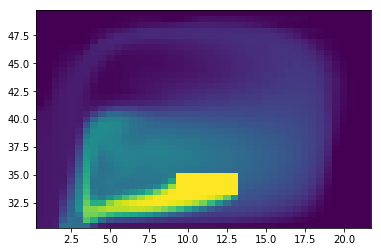

In [101]:
# Note that we undo the reshape operation to get the data back on the original horizontal grid
tmp = state_tensor[:,0].reshape( (nlat,nlon) )
plt.pcolormesh(data.xh,data.yh,tmp)